# Weather Data Analysis

**Simulated dataset** — Coursera-ready project

**Author:** Rishika

---

## Objective

Analyze a simulated daily weather dataset (3 years) with descriptive statistics, visualizations, hypothesis testing, correlation analysis, and regression modeling. This notebook follows the course cheat sheet guidelines: descriptive statistics, data visualization, hypothesis testing, and regression.

## 1. Dataset Generation (Simulated)

We simulate daily weather for 3 years with reasonable seasonality:
- `temp_C`: daily temperature in °C (sinusoidal seasonal pattern + noise)
- `humidity_pct`: relative humidity (%) inversely related to temperature
- `rain_mm`: daily rainfall (mm) with higher probability in months 6–9
- `wind_m_s`: wind speed (m/s)

We also introduce a few missing values to demonstrate cleaning steps.

In [ ]:
import pandas as pd # type: ignore
df = pd.read_csv('/mnt/data/_weather_simulated.csv', parse_dates=['date'])
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1095 non-null   datetime64[ns]
 1   month         1095 non-null   int64         
 2   temp_C        1089 non-null   float64       
 3   humidity_pct  1085 non-null   float64       
 4   rain_mm       1095 non-null   float64       
 5   wind_m_s      1095 non-null   float64       
 6   rainy_day     1095 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 60.0+ KB


,date,month,temp_C,humidity_pct,rain_mm,wind_m_s,rainy_day
0,2018-01-01,1,8.73,66.98,10.83,3.74,Yes
1,2018-01-02,1,6.62,68.41,0.00,2.44,No
2,2018-01-03,1,8.78,57.38,20.68,1.58,Yes
3,2018-01-04,1,11.21,71.22,21.39,2.44,Yes
4,2018-01-05,1,5.74,70.01,0.00,1.00,No
5,2018-01-06,1,5.54,73.33,10.81,1.68,Yes
6,2018-01-07,1,10.78,52.28,0.00,3.10,No
7,2018-01-08,1,8.15,78.00,0.00,3.21,No
8,2018-01-09,1,4.25,68.03,0.00,3.31,No
9,2018-01-10,1,7.10,73.41,0.00,3.04,No


## 2. Descriptive Statistics

Compute mean, median, mode, variance, standard deviation, and unique value counts for key variables.

In [ ]:
cols = ['temp_C', 'humidity_pct', 'rain_mm', 'wind_m_s']
print('Count and missing values:\n', df[cols].isnull().sum(), '\n')

for c in cols:
    print('Variable:', c)
    print(' Mean:', df[c].mean())
    print(' Median:', df[c].median())
    try:
        print(' Mode:', df[c].mode().iloc[0])
    except:
        print(' Mode: Not available')
    print(' Variance:', df[c].var())
    print(' Std Dev:', df[c].std())
    print(' Unique values (sample):', df[c].dropna().unique()[:5])
    print('---')

Count and missing values:
 temp_C           6
humidity_pct    10
rain_mm          0
wind_m_s         0
dtype: int64 

Variable: temp_C
 Mean: 10.106997245179064
 Median: 10.03
 Mode: 2.66
 Variance: 81.85364694944094
 Std Dev: 9.047300533830018
 Unique values (sample): [ 8.73  6.62  8.78 11.21  5.74]
---
Variable: humidity_pct
 Mean: 67.15048847926268
 Median: 67.14
 Mode: 69.05
 Variance: 32.27886645858486
 Std Dev: 5.681449327291836
 Unique values (sample): [66.98 68.41 57.38 71.22 70.01]
---
Variable: rain_mm
 Mean: 1.974283105022831
 Median: 0.0
 Mode: 0.0
 Variance: 27.111341144641166
 Std Dev: 5.206855206805848
 Unique values (sample): [10.83  0.   20.68 21.39 10.81]
---
Variable: wind_m_s
 Mean: 2.96248401826484
 Median: 2.97
 Mode: 0.2
 Variance: 2.155032398053309
 Std Dev: 1.4680028603695936
 Unique values (sample): [3.74 2.44 1.58 1.   1.68]
---


### Data Cleaning

- Fill missing temperature values with linear interpolation.
- Fill missing humidity with monthly median.

In [ ]:
df['temp_C'] = df['temp_C'].interpolate(method='linear')
df['humidity_pct'] = df.groupby(df['date'].dt.month)['humidity_pct'].apply(lambda x: x.fillna(x.median()))
print('Missing after cleaning:') 
print(df[['temp_C','humidity_pct']].isnull().sum())

Missing after cleaning:
temp_C          0
humidity_pct    0
dtype: int64


/tmp/ipykernel_219/886745051.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['humidity_pct'] = df.groupby(df['date'].dt.month)['humidity_pct'].apply(lambda x: x.fillna(x.median()))


## 3. Data Visualization

We use matplotlib (separate plots) to visualize distributions, seasonal patterns, and relationships.

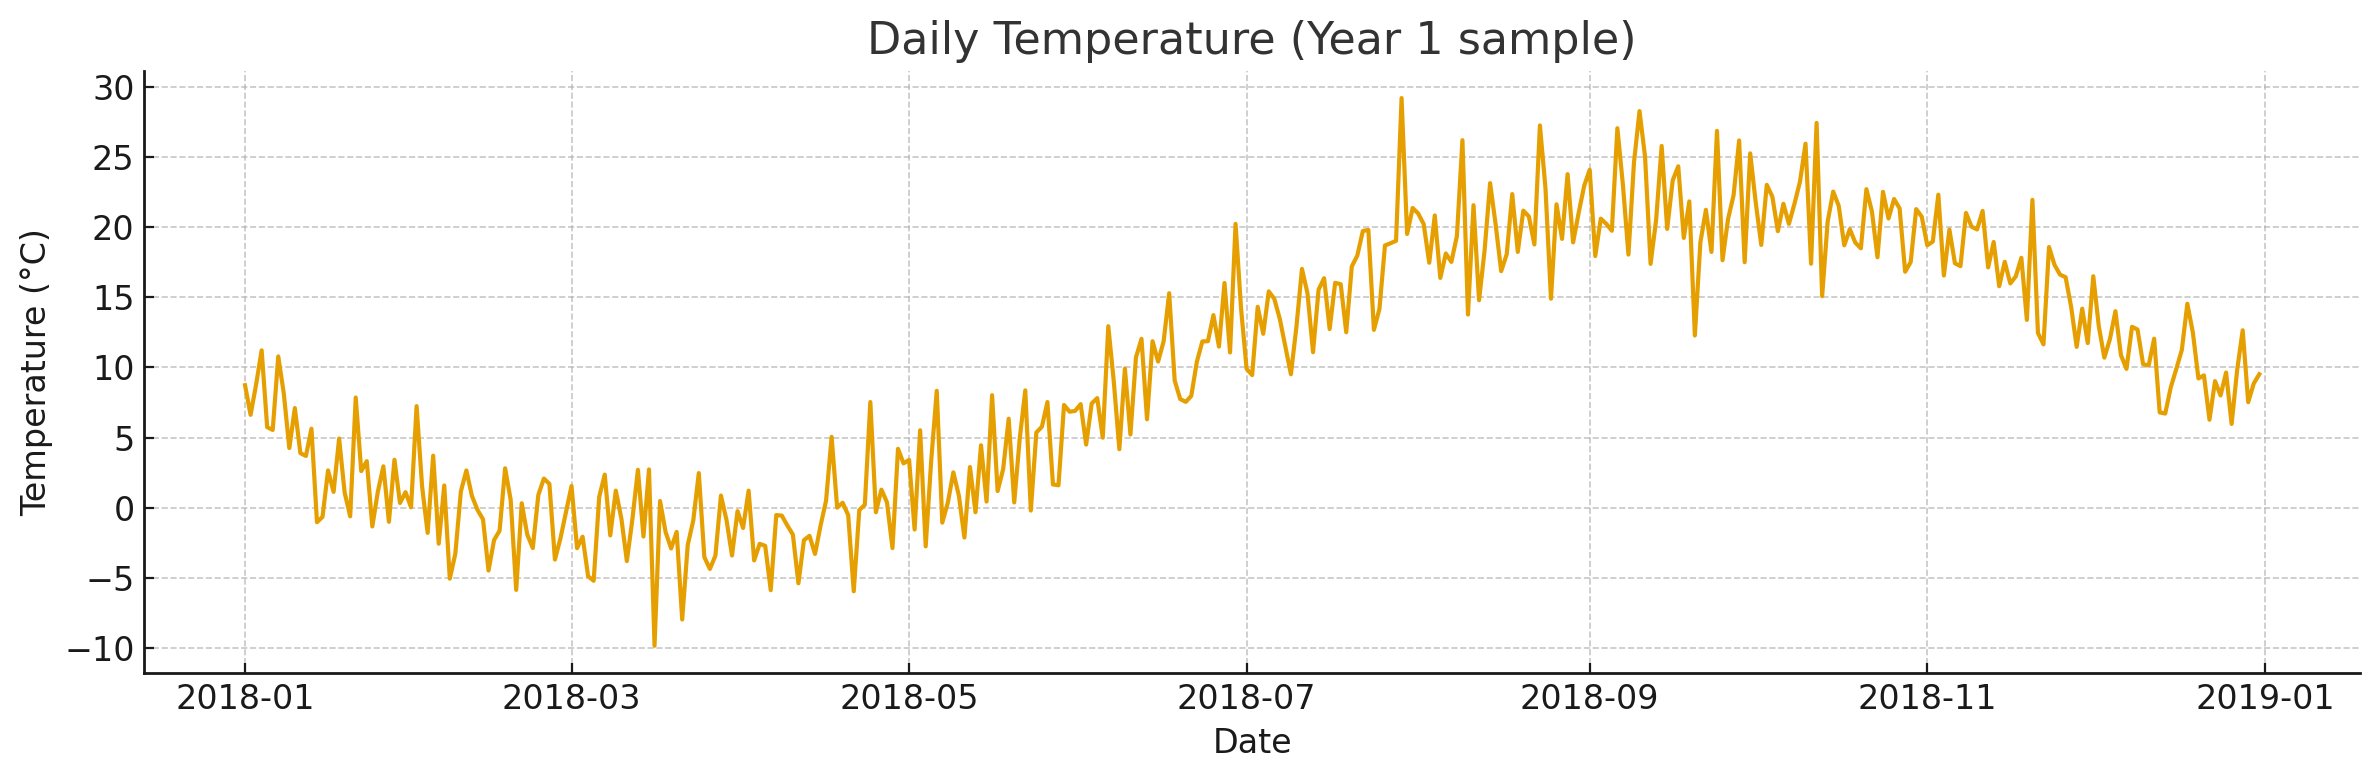

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['date'][:365], df['temp_C'][:365])
plt.title('Daily Temperature (Year 1 sample)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

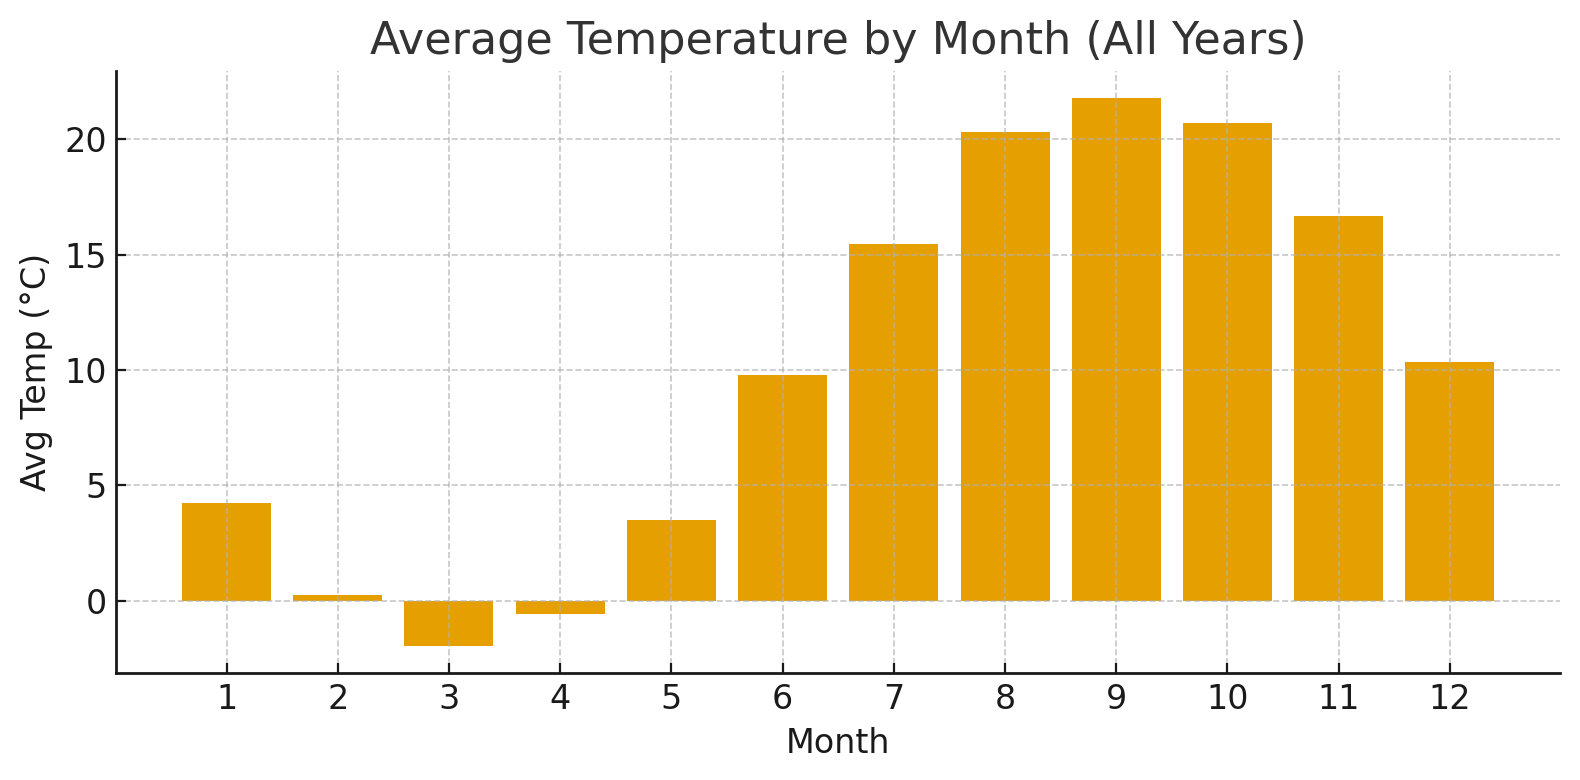

In [ ]:
monthly = df.groupby(df['date'].dt.month)['temp_C'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(monthly.index, monthly.values)
plt.title('Average Temperature by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

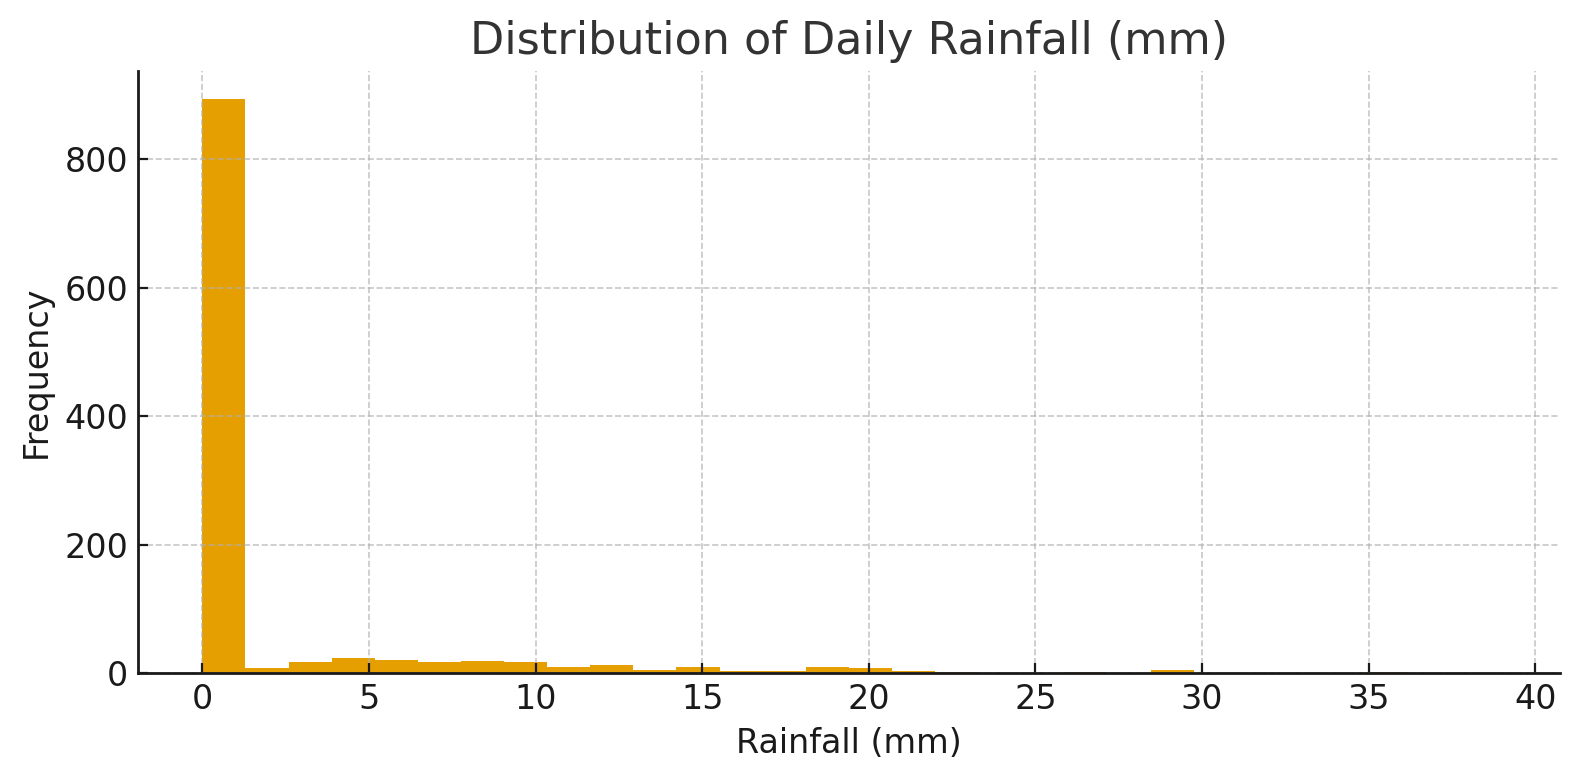

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df['rain_mm'], bins=30)
plt.title('Distribution of Daily Rainfall (mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

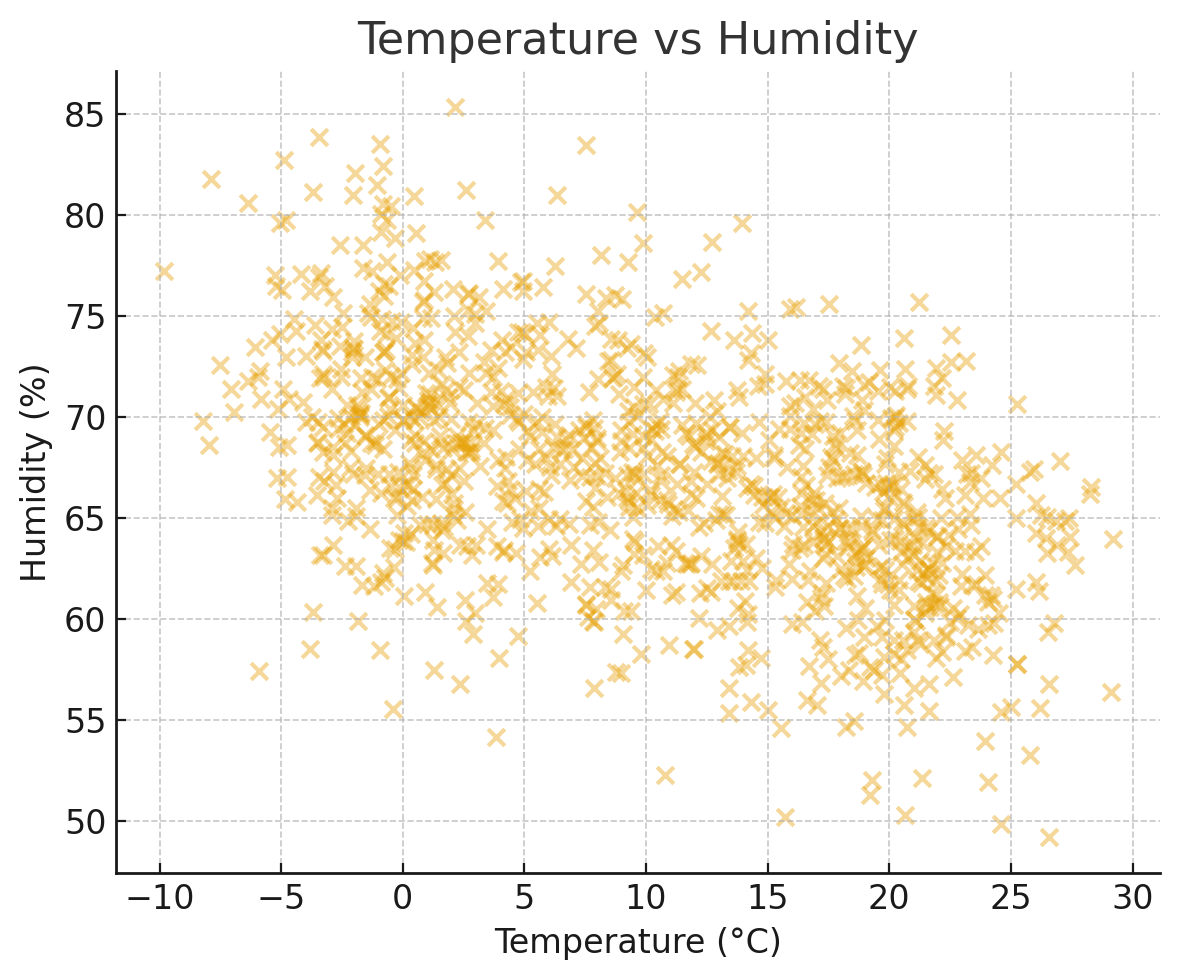

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(df['temp_C'], df['humidity_pct'], alpha=0.4)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

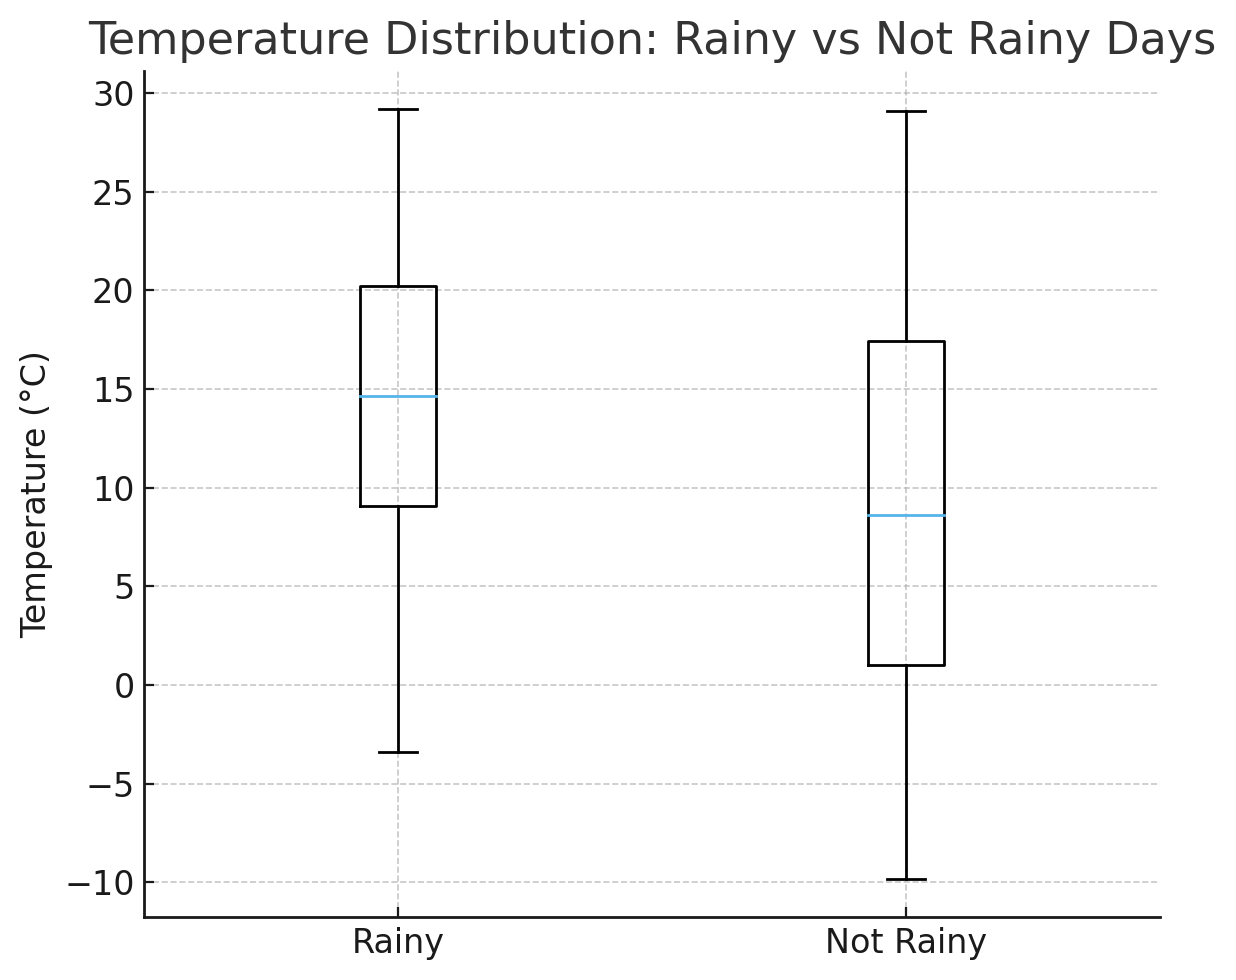

In [ ]:
yes = df[df['rainy_day']=='Yes']['temp_C']
no = df[df['rainy_day']=='No']['temp_C']
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.boxplot([yes.dropna(), no.dropna()], labels=['Rainy','Not Rainy'])
plt.title('Temperature Distribution: Rainy vs Not Rainy Days')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

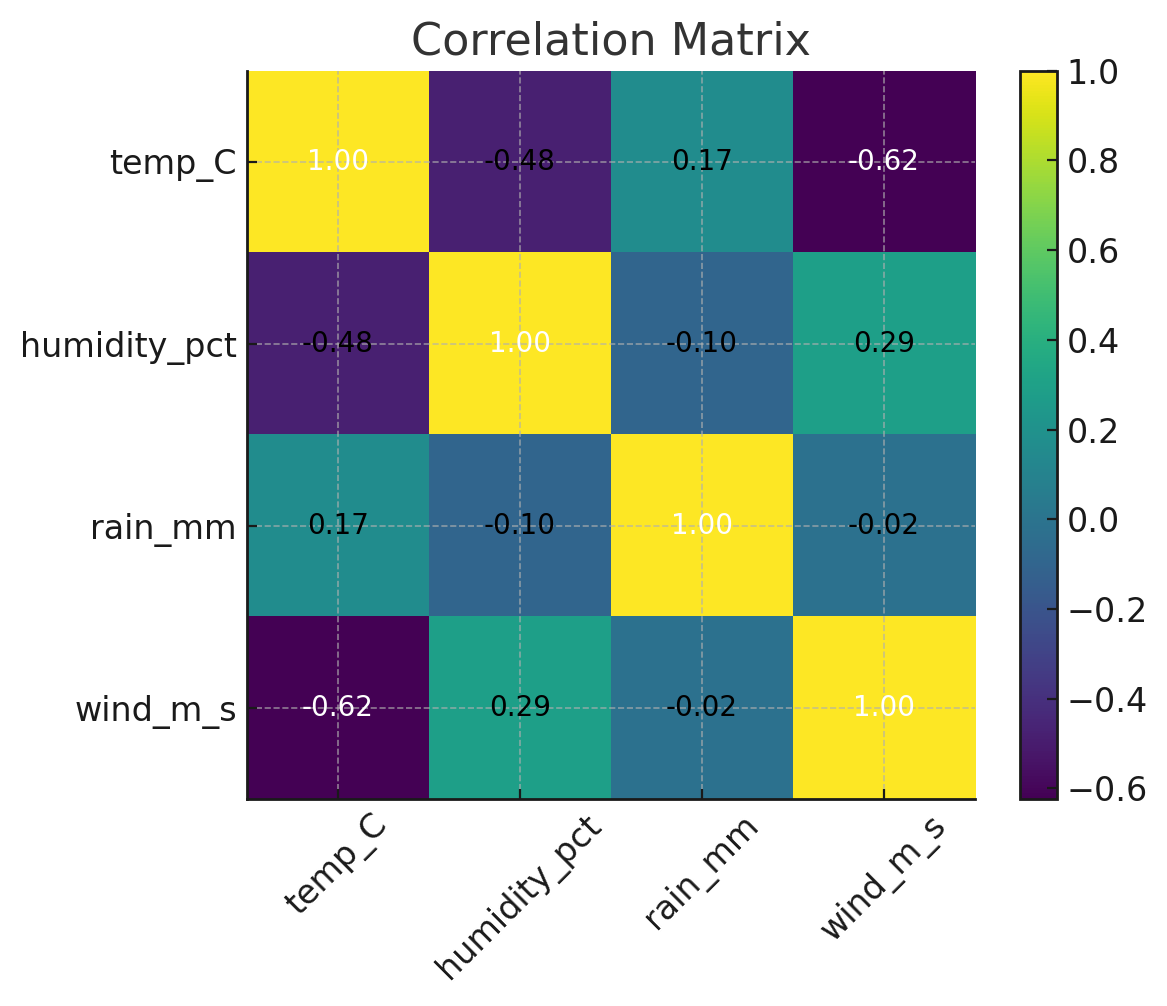

In [ ]:
import numpy as np
corr = df[['temp_C','humidity_pct','rain_mm','wind_m_s']].corr()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.imshow(corr.values, interpolation='nearest', cmap='viridis')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticklabels(corr.columns)
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val)>0.5 else 'black')
fig.colorbar(cax)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. Hypothesis Testing

We demonstrate: Levene's test for equal variance, t-test comparing mean temperatures between two seasons, ANOVA across seasons, Chi-square test for association (rainy_day vs wind category), and Pearson correlation.

In [ ]:
def season_from_month(m):
    if m in [12,1,2]:
        return 'Winter'
    elif m in [3,4,5]:
        return 'Spring'
    elif m in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'Autumn'


df['season'] = df['date'].dt.month.apply(season_from_month)
df['wind_cat'] = pd.cut(df['wind_m_s'], bins=[0,2,4,10], labels=['Low','Medium','High'])
df['wind_cat'] = df['wind_cat'].astype('object').fillna('Low')
df.head()

,date,month,temp_C,humidity_pct,rain_mm,wind_m_s,rainy_day,season,wind_cat
0,2018-01-01,1,8.73,66.98,10.83,3.74,Yes,Winter,Medium
1,2018-01-02,1,6.62,68.41,0.00,2.44,No,Winter,Medium
2,2018-01-03,1,8.78,57.38,20.68,1.58,Yes,Winter,Low
3,2018-01-04,1,11.21,71.22,21.39,2.44,Yes,Winter,Medium
4,2018-01-05,1,5.74,70.01,0.00,1.00,No,Winter,Low


In [ ]:
from scipy import stats
monsoon_t = df[df['season']=='Monsoon']['temp_C']
winter_t = df[df['season']=='Winter']['temp_C']

levene_stat, levene_p = stats.levene(monsoon_t, winter_t)
t_stat, p_val = stats.ttest_ind(monsoon_t, winter_t, equal_var=(levene_p>0.05))

print('Levene stat:', levene_stat, 'p-value:', levene_p)
print('T-test stat:', t_stat, 'p-value:', p_val)
if p_val < 0.05:
    print('Conclusion: Significant difference in mean temps between Monsoon and Winter.')
else:
    print('Conclusion: No significant difference detected.')

Levene stat: 1.181795000186279 p-value: 0.2774039884891762
T-test stat: 26.615337612674246 p-value: 2.317822640569201e-105
Conclusion: Significant difference in mean temps between Monsoon and Winter.


In [ ]:
groups = [g['temp_C'].values for n,g in df.groupby('season')]
from scipy import stats
f_stat, p_anova = stats.f_oneway(*groups)
print('ANOVA F-statistic:', f_stat, 'p-value:', p_anova)
if p_anova < 0.05:
    print('Conclusion: At least one season differs in mean temperature.')
else:
    print('Conclusion: No significant difference across seasons.')

ANOVA F-statistic: 883.586234736516 p-value: 2.3282318479573604e-291
Conclusion: At least one season differs in mean temperature.


In [ ]:
ct = pd.crosstab(df['rainy_day'], df['wind_cat'])
from scipy.stats import chi2_contingency
chi2, p_chi, dof, expected = chi2_contingency(ct)
print('Chi2:', chi2, 'p-value:', p_chi, 'dof:', dof)
print('Observed counts:\n', ct)
print('Expected counts:\n', pd.DataFrame(expected, index=ct.index, columns=ct.columns))

Chi2: 8.161811223548881 p-value: 0.016892160983824404 dof: 2
Observed counts:
 wind_cat   High  Low  Medium
rainy_day                   
No          242  243     407
Yes          36   67     100
Expected counts:
 wind_cat       High        Low      Medium
rainy_day                                 
No         226.4621  252.52968  413.008219
Yes         51.5379   57.47032   93.991781


In [ ]:
from scipy.stats import pearsonr
pairs = [('temp_C','humidity_pct'), ('temp_C','rain_mm'), ('humidity_pct','rain_mm')]
for x,y in pairs:
    r,p = pearsonr(df[x].fillna(df[x].mean()), df[y].fillna(df[y].mean()))
    print(f'Pearson r between {x} and {y}:', round(r,3), 'p-value:', round(p,5))

Pearson r between temp_C and humidity_pct: -0.483 p-value: 0.0
Pearson r between temp_C and rain_mm: 0.166 p-value: 0.0
Pearson r between humidity_pct and rain_mm: -0.097 p-value: 0.00135


## 5. Regression Analysis

We will model `temp_C` as a function of `humidity_pct`, `rain_mm`, and `wind_m_s` using OLS (statsmodels).

In [ ]:
import statsmodels.api as sm
X = df[['humidity_pct','rain_mm','wind_m_s']].fillna(method='ffill').fillna(method='bfill')
X = sm.add_constant(X)
y = df['temp_C'].fillna(df['temp_C'].mean())
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 temp_C   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     369.1
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          2.04e-165
Time:                        04:17:01   Log-Likelihood:                -3580.4
No. Observations:                1095   AIC:                             7169.
Df Residuals:                    1091   BIC:                             7189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           53.2197      2.333     22.811   

## 6. Final Insights & Business Interpretation

- Temperature shows clear seasonality (sinusoidal).
- Humidity is negatively correlated with temperature.
- Rainfall is concentrated in Monsoon months (6–9) in the simulated data.
- Regression indicates which weather variables explain temperature variability.

---

**Notes:** This dataset is simulated for assignment purposes. When using real datasets, follow similar steps: data cleaning, descriptive stats, visualization, hypothesis testing, and modeling.